#Prática
Nesta aula vamos conhecer como aplicar e utilizar o K-means,
uma técnica não supervisionada, de agrupamento que o professor Jones demonstrou em aula.


In [ ]:
import pandas as pd
pd.set_option('display.max_columns', None)
df = pd.read_excel("Fonte dos Dados.xlsx")
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,Ativos com Médio Nível Educacional,Ativos com Alto Nível Educacional,Percentual de estrangeiros ao total de Trabalhadores,PIB Municipal,Estudantes Ensino primário,Estudantes Ensino secundário,Estudantes Ensino superior,Óbitos até 1 ano de idade por milhares de habitantes,Óbitos por milhares de habitantes,Nascidos por milhares de habitantes,Hospitais por milhares de habitantes,Médicos por milhares de habitantes,% de pobres,IDH,Percentual de trabalhadores especializados,"Valores de Importação por 10,000 habitantes","Valores de Exportação por 10,000 habitantes","Número de hotéis por 10,000 habitantes",Percentual de empresas do setor primário em relação ao total,Percentual de empresas do setor secundário em relação ao total,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538.0,6.93,52.92,43.04,4.04,48.34,0.00,75.34,19.52,5.14,0.08,1.221749e+08,3382.0,643.0,27.0,0.3,2.8,18.1,0.0,0.00,36.56,0.81,4.06,0.00,0.00,0.00,6.56,18.03,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072.0,1.22,55.58,40.07,4.35,65.30,2.39,66.83,26.93,6.23,14.19,4.205170e+07,2210.0,473.0,102.0,0.3,2.5,63.2,0.0,0.17,44.09,0.77,5.44,0.00,0.00,3.29,0.00,0.00,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398.0,5.46,51.88,42.76,5.37,70.02,21.27,70.67,21.29,8.04,2.00,1.906333e+08,4839.0,1297.0,309.0,0.1,4.2,25.0,0.0,0.14,35.22,0.77,8.55,14731.75,2119542.01,0.93,9.23,6.92,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471.0,2.79,52.71,42.60,4.69,44.07,0.16,71.05,22.05,6.90,1.07,8.616439e+07,2348.0,487.0,53.0,0.4,0.5,21.0,0.0,0.00,37.61,0.77,5.52,0.00,0.00,0.00,40.00,6.67,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798.0,5.17,53.92,41.92,4.16,44.60,0.82,77.90,16.60,5.49,0.00,1.083468e+08,2539.0,327.0,37.0,0.1,0.8,16.8,0.0,0.00,35.00,0.79,5.30,0.00,93536.03,0.00,12.50,25.00,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


In [ ]:
#seleciona apenas as colunas que vamos utilizar
df = df.iloc[:,3:5]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5565 entries, 0 to 5564
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Densidade demográfica  5565 non-null   float64
 1   Porcentagem de Jovens  5565 non-null   float64
dtypes: float64(2)
memory usage: 87.1 KB


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3) #k=3
kmeans.fit(df) #aplica o agrupamento

KMeans(n_clusters=3)

In [ ]:
#kmeans = KMeans(n_clusters=3).fit(df) # instanciar o modelo e fazer o treinamento ao mesmo tempo
centroids = kmeans.cluster_centers_
print(centroids)

[[  53.7433078    43.22512217]
 [8567.89117647   39.76882353]
 [2543.3209375    40.62703125]]


In [ ]:
df

,Densidade demográfica,Porcentagem de Jovens
0,6.93,52.92
1,1.22,55.58
2,5.46,51.88
3,2.79,52.71
4,5.17,53.92
...,...,...
5560,21.00,50.27
5561,2.21,47.27
5562,2.34,45.97
5563,8.00,46.58


In [ ]:
df_clusterizado = df

In [ ]:
df_clusterizado["label"] = kmeans.labels_
df_clusterizado

,Densidade demográfica,Porcentagem de Jovens,label
0,6.93,52.92,0
1,1.22,55.58,0
2,5.46,51.88,0
3,2.79,52.71,0
4,5.17,53.92,0
...,...,...,...
5560,21.00,50.27,0
5561,2.21,47.27,0
5562,2.34,45.97,0
5563,8.00,46.58,0


In [ ]:
df_clusterizado[df_clusterizado['label']==1]

,Densidade demográfica,Porcentagem de Jovens,label
677,7786.44,42.04,1
1629,7167.00,35.85,1
3293,9063.58,38.77,1
3314,7039.64,38.18,1
3599,6031.38,42.40,1
3637,8117.62,36.31,1
3665,13024.56,39.45,1
4827,10698.32,42.17,1
4859,12553.29,41.63,1
4888,5692.94,45.04,1


In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

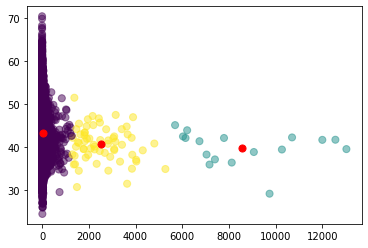

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
plt.scatter(df['Densidade demográfica'], df['Porcentagem de Jovens'], c= kmeans.labels_.astype(float), s=50, alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', s=50)
plt.show()


In [ ]:
kmeans.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
kmeans.inertia_

213160827.5304457